In [12]:
#Task 1
from imblearn.datasets import fetch_datasets


In [13]:
abds = fetch_datasets()["abalone"]

In [14]:
X, y = abds.data, abds.target

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
last3digits_student_id = 426

In [17]:
p_seed = last3digits_student_id % 79

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=p_seed)

In [19]:
#Task 2 and 3 DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from imblearn.metrics import geometric_mean_score
# Create and train the dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# print(f'\ny_test: length: {len(y_test)}\n',y_test)
# print(f'\ny_pred_dummy: length: {len(y_pred_dummy)}\n',y_pred_dummy)

# Task 2
# Evaluate the dummy classifier
bal_acc_dummy = balanced_accuracy_score(y_test, y_pred_dummy)
geo_mean_dummy = geometric_mean_score(y_test, y_pred_dummy)
macro_f1_dummy = f1_score(y_test, y_pred_dummy, average='macro')
weighted_f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted')
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)


print(f"Dummy Classifier - Balanced Accuracy: {bal_acc_dummy:.4f}")
print(f"Dummy Classifier - Geometric Mean: {geo_mean_dummy:.4f}")
print(f"Dummy Classifier - Macro F1: {macro_f1_dummy:.4f}")
print(f"Dummy Classifier - Weighted F1: {weighted_f1_dummy:.4f}")
print(f"Dummy Classifier - Accuracy Score: {accuracy_dummy:.4f}")



Dummy Classifier - Balanced Accuracy: 0.5000
Dummy Classifier - Geometric Mean: 0.0000
Dummy Classifier - Macro F1: 0.4754
Dummy Classifier - Weighted F1: 0.8616
Dummy Classifier - Accuracy Score: 0.9062


In [20]:
#Task 4 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Train decision tree classifier
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=p_seed)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the decision tree
bal_acc_dt = balanced_accuracy_score(y_test, y_pred_dt)
geo_mean_dt = geometric_mean_score(y_test, y_pred_dt)
macro_f1_dt = f1_score(y_test, y_pred_dt, average='macro')
weighted_f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree - Balanced Accuracy: {bal_acc_dt:.4f}")
print(f"Decision Tree - Geometric Mean: {geo_mean_dt:.4f}")
print(f"Decision Tree - Macro F1: {macro_f1_dt:.4f}")
print(f"Decision Tree - Weighted F1: {weighted_f1_dt:.4f}")
print(f"Decision Tree - Accuracy Score: {accuracy_dt:.4f}")


Decision Tree - Balanced Accuracy: 0.4995
Decision Tree - Geometric Mean: 0.0000
Decision Tree - Macro F1: 0.4751
Decision Tree - Weighted F1: 0.8612
Decision Tree - Accuracy Score: 0.9053


In [21]:
#Task 5 RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=p_seed)
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# Train decision tree on undersampled data
dt_rus = DecisionTreeClassifier(max_depth=4, random_state=p_seed)
dt_rus.fit(X_train_us, y_train_us)
y_pred_rus = dt_rus.predict(X_test)

# Evaluate undersampled decision tree
bal_acc_rus = balanced_accuracy_score(y_test, y_pred_rus)
geo_mean_rus = geometric_mean_score(y_test, y_pred_rus)
macro_f1_rus = f1_score(y_test, y_pred_rus, average='macro')
weighted_f1_rus = f1_score(y_test, y_pred_rus, average='weighted')
accuracy_rus = accuracy_score(y_test, y_pred_rus)

print(f"Undersampled Decision Tree - Balanced Accuracy: {bal_acc_rus:.4f}")
print(f"Undersampled Decision Tree - Geometric Mean: {geo_mean_rus:.4f}")
print(f"Undersampled Decision Tree - Macro F1: {macro_f1_rus:.4f}")
print(f"Undersampled Decision Tree - Weighted F1: {weighted_f1_rus:.4f}")
print(f"Undersampled Decision Tree - Accuracy Score: {accuracy_rus:.4f}")


Undersampled Decision Tree - Balanced Accuracy: 0.8001
Undersampled Decision Tree - Geometric Mean: 0.7897
Undersampled Decision Tree - Macro F1: 0.5820
Undersampled Decision Tree - Weighted F1: 0.7591
Undersampled Decision Tree - Accuracy Score: 0.6957


In [22]:
#Task 6 balance class DecisionTreeClassifier
# Train decision tree with class weighting
dt_weighted = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=p_seed)
dt_weighted.fit(X_train, y_train)
y_pred_weighted = dt_weighted.predict(X_test)

# Evaluate the class-weighted decision tree
bal_acc_weighted = balanced_accuracy_score(y_test, y_pred_weighted)
geo_mean_weighted = geometric_mean_score(y_test, y_pred_weighted)
macro_f1_weighted = f1_score(y_test, y_pred_weighted, average='macro')
weighted_f1_weighted = f1_score(y_test, y_pred_weighted, average='weighted')
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

print(f"Class Weighted Decision Tree - Balanced Accuracy: {bal_acc_weighted:.4f}")
print(f"Class Weighted Decision Tree - Geometric Mean: {geo_mean_weighted:.4f}")
print(f"Class Weighted Decision Tree - Macro F1: {macro_f1_weighted:.4f}")
print(f"Class Weighted Decision Tree - Weighted F1: {weighted_f1_weighted:.4f}")
print(f"Class Weighted Decision Tree - Accuracy Score: {accuracy_weighted:.4f}")


Class Weighted Decision Tree - Balanced Accuracy: 0.8073
Class Weighted Decision Tree - Geometric Mean: 0.8063
Class Weighted Decision Tree - Macro F1: 0.6374
Class Weighted Decision Tree - Weighted F1: 0.8190
Class Weighted Decision Tree - Accuracy Score: 0.7751


In [23]:
#Task 7
#Need to compare with DummyClassifier from Task 3 to Task 7
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=p_seed)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train decision tree on oversampled data
dt_smote = DecisionTreeClassifier(max_depth=4, random_state=p_seed)
dt_smote.fit(X_train_sm, y_train_sm)
y_pred_smote = dt_smote.predict(X_test)

# Evaluate SMOTE-trained decision tree
bal_acc_smote = balanced_accuracy_score(y_test, y_pred_smote)
geo_mean_smote = geometric_mean_score(y_test, y_pred_smote)
macro_f1_smote = f1_score(y_test, y_pred_smote, average='macro')
weighted_f1_smote = f1_score(y_test, y_pred_smote, average='weighted')
accuracy_smote = accuracy_score(y_test, y_pred_smote)

print(f"SMOTE Decision Tree - Balanced Accuracy: {bal_acc_smote:.4f}")
print(f"SMOTE Decision Tree - Geometric Mean: {geo_mean_smote:.4f}")
print(f"SMOTE Decision Tree - Macro F1: {macro_f1_smote:.4f}")
print(f"SMOTE Decision Tree - Weighted F1: {weighted_f1_smote:.4f}")
print(f"SMOTE Decision Tree - Accuracy Score: {accuracy_smote:.4f}")


SMOTE Decision Tree - Balanced Accuracy: 0.8087
SMOTE Decision Tree - Geometric Mean: 0.8073
SMOTE Decision Tree - Macro F1: 0.6337
SMOTE Decision Tree - Weighted F1: 0.8148
SMOTE Decision Tree - Accuracy Score: 0.7694


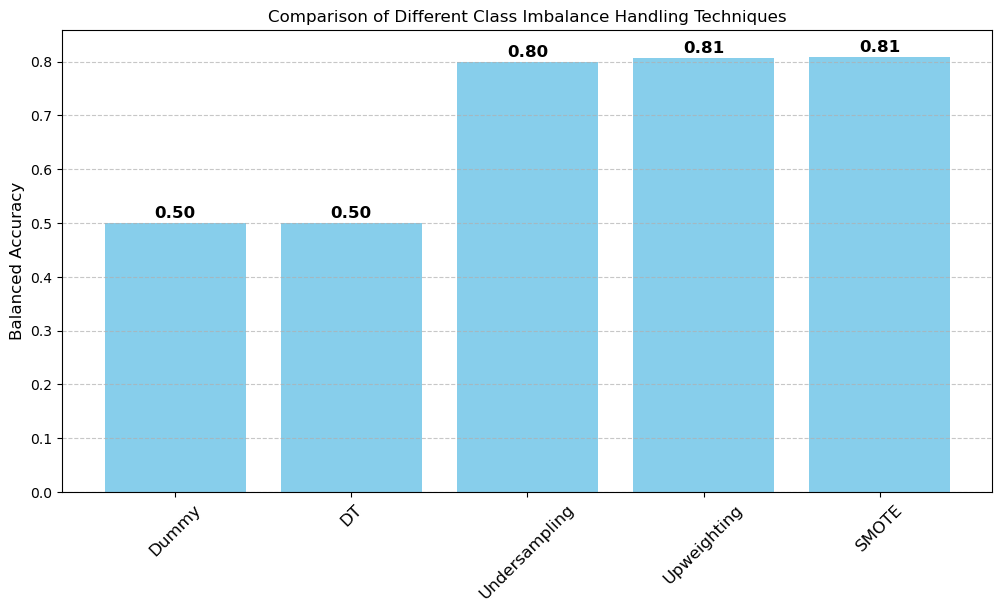

In [24]:
#Task 3 to 7 evaluation chart Balance Accuracy
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
models = ["Dummy", "DT", "Undersampling", "Upweighting", "SMOTE"]
balanced_accuracies = [bal_acc_dummy, bal_acc_dt, bal_acc_rus, bal_acc_weighted, bal_acc_smote]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(models, balanced_accuracies, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(balanced_accuracies) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Balanced Accuracy", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Geo mean dummy:  0.0
Geo mean dt:  0.0


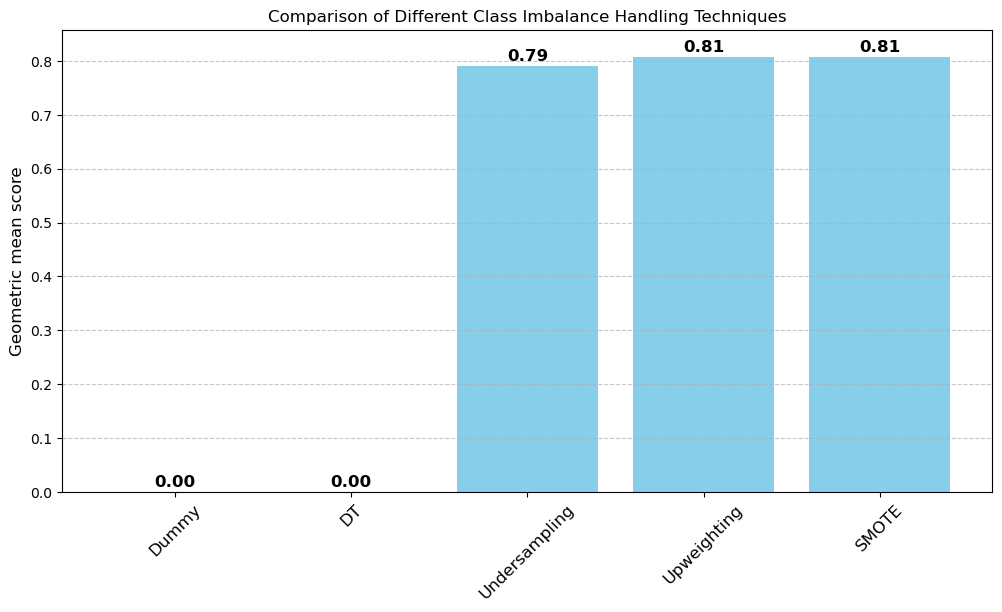

In [25]:
#Task 3 to 7 evaluation chart Geometric Mean
import matplotlib.pyplot as plt
import numpy as np
# Define values
geometric_mean_scores = [geo_mean_dummy, geo_mean_dt, geo_mean_rus, geo_mean_weighted, geo_mean_smote]
print('Geo mean dummy: ', geo_mean_dummy)
print('Geo mean dt: ', geo_mean_dt)
# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(models, geometric_mean_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(geometric_mean_scores) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')


plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Geometric mean score", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

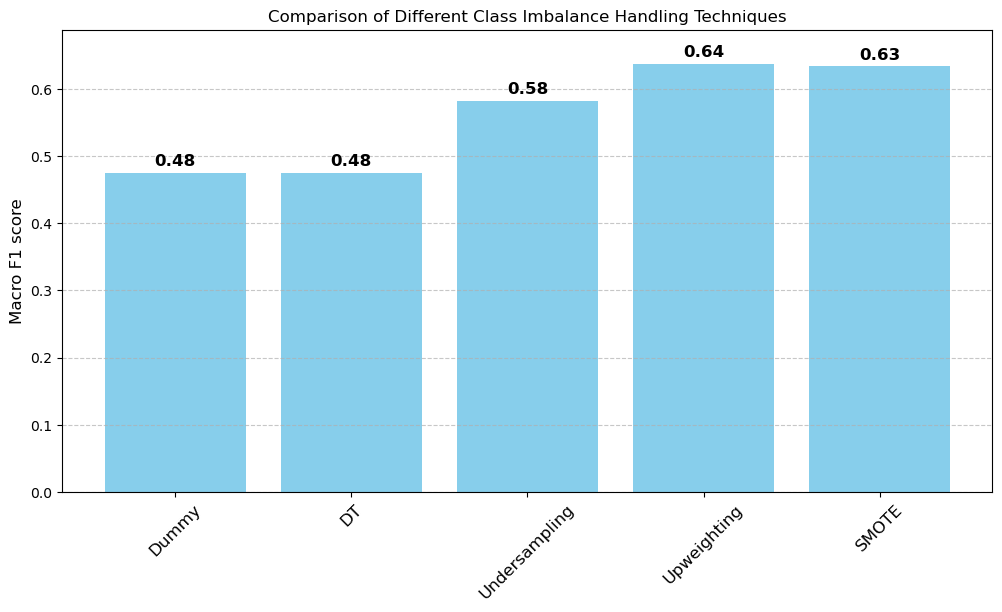

In [26]:
#Task 3 to 7 evaluation chart Macro F1 Score
# Define values
macro_f1_scores = [macro_f1_dummy, macro_f1_dt, macro_f1_rus, macro_f1_weighted, macro_f1_smote]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(models, macro_f1_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(macro_f1_scores) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Macro F1 score", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

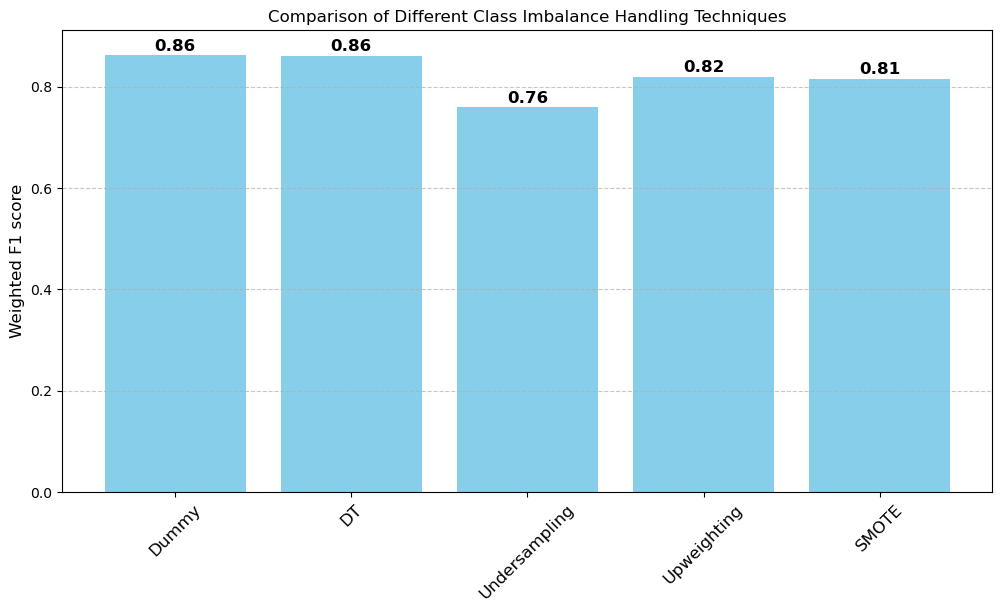

In [27]:
#Task 3 to 7 evaluation chart Weighted F1 Score
# Define values
weighted_f1_scores = [weighted_f1_dummy, weighted_f1_dt, weighted_f1_rus, weighted_f1_weighted, weighted_f1_smote]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(models, weighted_f1_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(weighted_f1_scores) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')


plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Weighted F1 score", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

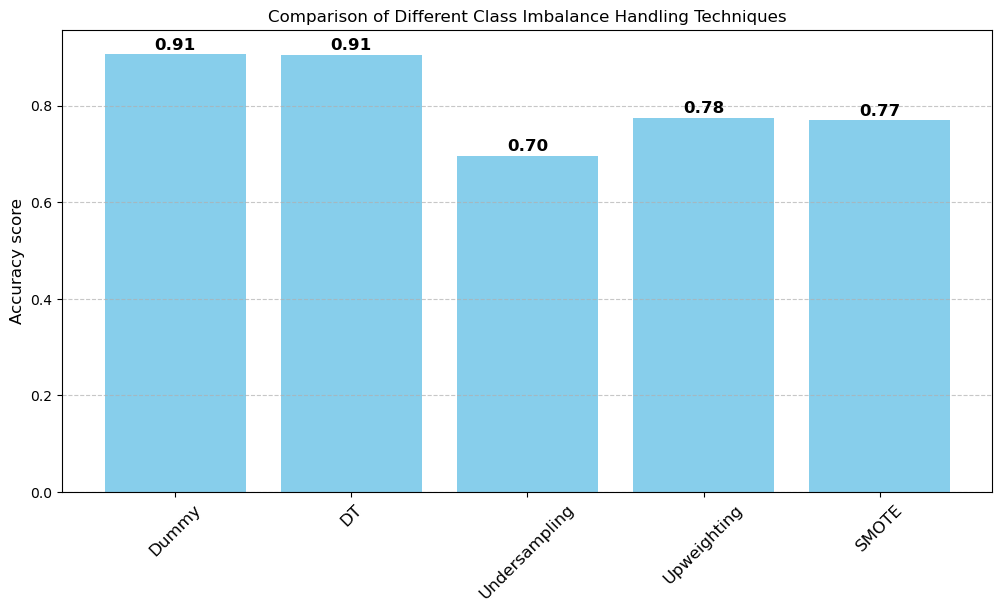

In [28]:
#Task 3 to 7 evaluation chart Accuracy Score
# Define values
accuracy_scores = [accuracy_dummy, accuracy_dt, accuracy_rus, accuracy_weighted, accuracy_smote]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(models, accuracy_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(accuracy_scores) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')


plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Accuracy score", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
print('----------Classifier Traning for the Ensemble Method Start---------')

----------Classifier Traning for the Ensemble Method Start---------


In [30]:
#Task 8
#For evaluations: baseline is BaggingClassifier
#Need to train classifiers for comparisons: EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, 
#and BalancedRandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier

# Train ensemble classifiers
bagging_clf = BaggingClassifier(random_state=p_seed)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

#EasyEnsembleClassifier
easy_ensemble_clf = EasyEnsembleClassifier(random_state=p_seed)
easy_ensemble_clf.fit(X_train, y_train)
y_pred_easy = easy_ensemble_clf.predict(X_test)

#RUSBoostClassifier
rusboost_clf = RUSBoostClassifier(random_state=p_seed)
rusboost_clf.fit(X_train, y_train)
y_pred_rusboost = rusboost_clf.predict(X_test)

#BalancedBaggingClassifier
balanced_bagging_clf = BalancedBaggingClassifier(random_state=p_seed)
balanced_bagging_clf.fit(X_train, y_train)
y_pred_bal_bagging = balanced_bagging_clf.predict(X_test)

#BalancedRandomForestClassifier
balanced_rf_clf = BalancedRandomForestClassifier(random_state=p_seed)
balanced_rf_clf.fit(X_train, y_train)
y_pred_bal_rf = balanced_rf_clf.predict(X_test)


# balance accuracy
bal_acc_bagging = balanced_accuracy_score(y_test, y_pred_bagging)
bal_acc_easy = balanced_accuracy_score(y_test, y_pred_easy)
bal_acc_rusboost = balanced_accuracy_score(y_test, y_pred_rusboost)
bal_acc_bal_bagging = balanced_accuracy_score(y_test, y_pred_bal_bagging)
bal_acc_bal_rf = balanced_accuracy_score(y_test, y_pred_bal_rf)

# Geometric mean
geo_mean_bagging = geometric_mean_score(y_test, y_pred_bagging)
geo_mean_easy = geometric_mean_score(y_test, y_pred_easy)
geo_mean_rusboost = geometric_mean_score(y_test, y_pred_rusboost)
geo_mean_bal_bagging = geometric_mean_score(y_test, y_pred_bal_bagging)
geo_mean_bal_rf = geometric_mean_score(y_test, y_pred_bal_rf)

# F1 score
macro_f1_bagging = f1_score(y_test, y_pred_bagging, average='macro')
macro_f1_easy = f1_score(y_test, y_pred_easy, average='macro')
macro_f1_rusboost = f1_score(y_test, y_pred_rusboost, average='macro')
macro_f1_bal_bagging = f1_score(y_test, y_pred_bal_bagging, average='macro')
macro_f1_bal_rf = f1_score(y_test, y_pred_bal_rf, average='macro')

# Weighted F1
weighted_f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')
weighted_f1_easy = f1_score(y_test, y_pred_easy, average='weighted')
weighted_f1_rusboost = f1_score(y_test, y_pred_rusboost, average='weighted')
weighted_f1_bal_bagging = f1_score(y_test, y_pred_bal_bagging, average='weighted')
weighted_f1_bal_rf = f1_score(y_test, y_pred_bal_rf, average='weighted')

#Accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_easy = accuracy_score(y_test, y_pred_easy)
accuracy_rusboost = accuracy_score(y_test, y_pred_rusboost)
accuracy_bal_bagging = accuracy_score(y_test, y_pred_bal_bagging)
accuracy_bal_rf = accuracy_score(y_test, y_pred_bal_rf)




In [31]:

#for name, y_pred in models.items():
#    print(f"{name} - Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
#Balance Accuracy
print('\n\nBalance Accuracy')
print(f"Bagging - Balanced Accuracy: {bal_acc_bagging:.4f}")
print(f"EasyEnsemble - Balanced Accuracy: {bal_acc_easy:.4f}")
print(f"RUSBoost - Balanced Accuracy: {bal_acc_rusboost:.4f}")
print(f"BalancedBagging - Balanced Accuracy: {bal_acc_bal_bagging:.4f}")
print(f"BalancedRandomForest - Balanced Accuracy: {bal_acc_bal_rf:.4f}")

#Geometric mean
print('\n\nGeometric mean')
print(f"Bagging - Geometric mean score: {geo_mean_bagging:.4f}")
print(f"EasyEnsemble - Geometric mean score: {geo_mean_easy:.4f}")
print(f"RUSBoost - Geometric mean score: {geo_mean_rusboost:.4f}")
print(f"BalancedBagging - Geometric mean score: {geo_mean_bal_bagging:.4f}")
print(f"BalancedRandomForest - Geometric mean score: {geo_mean_bal_rf:.4f}")


# F1 score
print('\n\nF1 score')
print(f"Bagging -  Macro F1: {macro_f1_bagging:.4f}")
print(f"EasyEnsemble -  Macro F1: {macro_f1_easy:.4f}")
print(f"RUSBoost -  Macro F1: {macro_f1_rusboost:.4f}")
print(f"BalancedBagging -  Macro F1: {macro_f1_bal_bagging:.4f}")
print(f"BalancedRandomForest -  Macro F1: {macro_f1_bal_rf:.4f}")

# Weighted F1
print('\n\nWeighted F1')
print(f"Bagging -  Weighted F1: {weighted_f1_bagging:.4f}")
print(f"EasyEnsemble - Weighted F1: {weighted_f1_easy:.4f}")
print(f"RUSBoost - Weighted F1: {weighted_f1_rusboost:.4f}")
print(f"BalancedBagging - Weighted F1: {weighted_f1_bal_bagging:.4f}")
print(f"BalancedRandomForest - Weighted F1: {weighted_f1_bal_rf:.4f}")

# Weighted F1
print('\n\nAccuracy Score')
print(f"Bagging -  Accuracy Score: {accuracy_bagging:.4f}")
print(f"EasyEnsemble - Accuracy Score: {accuracy_easy:.4f}")
print(f"RUSBoost - Accuracy Score: {accuracy_rusboost:.4f}")
print(f"BalancedBagging - Accuracy Score: {accuracy_bal_bagging:.4f}")
print(f"BalancedRandomForest - Accuracy Score: {accuracy_bal_rf:.4f}")



Balance Accuracy
Bagging - Balanced Accuracy: 0.5389
EasyEnsemble - Balanced Accuracy: 0.8110
RUSBoost - Balanced Accuracy: 0.5000
BalancedBagging - Balanced Accuracy: 0.7352
BalancedRandomForest - Balanced Accuracy: 0.8015


Geometric mean
Bagging - Geometric mean score: 0.3155
EasyEnsemble - Geometric mean score: 0.8009
RUSBoost - Geometric mean score: 0.0000
BalancedBagging - Geometric mean score: 0.7306
BalancedRandomForest - Geometric mean score: 0.8014


F1 score
Bagging -  Macro F1: 0.5480
EasyEnsemble -  Macro F1: 0.5921
RUSBoost -  Macro F1: 0.4754
BalancedBagging -  Macro F1: 0.6321
BalancedRandomForest -  Macro F1: 0.6656


Weighted F1
Bagging -  Weighted F1: 0.8692
EasyEnsemble - Weighted F1: 0.7681
RUSBoost - Weighted F1: 0.8616
BalancedBagging - Weighted F1: 0.8352
BalancedRandomForest - Weighted F1: 0.8468


Accuracy Score
Bagging -  Accuracy Score: 0.8938
EasyEnsemble - Accuracy Score: 0.7072
RUSBoost - Accuracy Score: 0.9062
BalancedBagging - Accuracy Score: 0.8019
B

In [32]:
print('----------------Ensemble method Evaluation charts start----------------------')

----------------Ensemble method Evaluation charts start----------------------


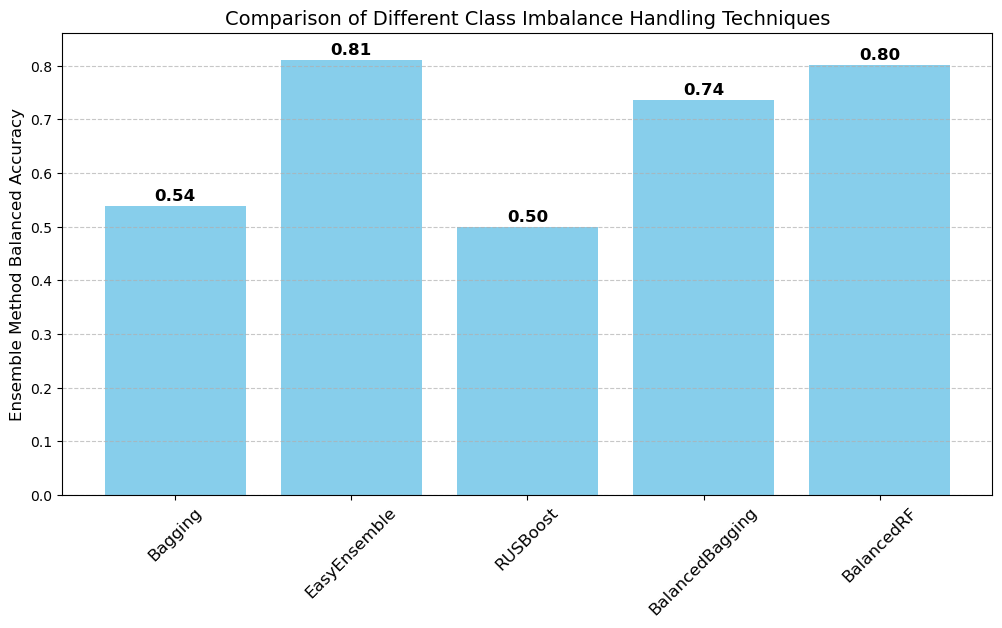

In [33]:
#Task 8
#ensemble method balance accuracy
#ENHANCED
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
ensemble_models = ["Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
ensemble_balanced_accuracies = [bal_acc_bagging, bal_acc_easy, bal_acc_rusboost, bal_acc_bal_bagging, bal_acc_bal_rf]

# Set up figure
plt.figure(figsize=(12,6))
bars = plt.bar(ensemble_models, ensemble_balanced_accuracies, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(ensemble_balanced_accuracies) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

# Labeling
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Ensemble Method Balanced Accuracy", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

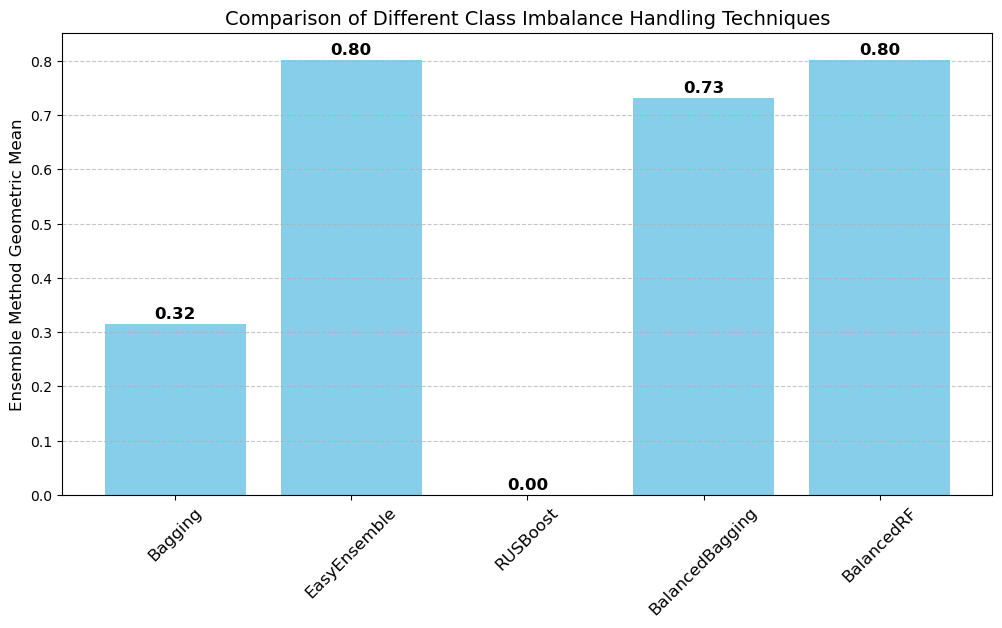

In [34]:
#Task 8
#ensemble method Geometric mean
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
ensemble_models = ["Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
ensemble_geo_mean_scores = [geo_mean_bagging, geo_mean_easy, geo_mean_rusboost, geo_mean_bal_bagging, geo_mean_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(ensemble_models, ensemble_geo_mean_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(ensemble_geo_mean_scores) + 0.05  # Adding buffer above highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Ensemble Method Geometric Mean", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

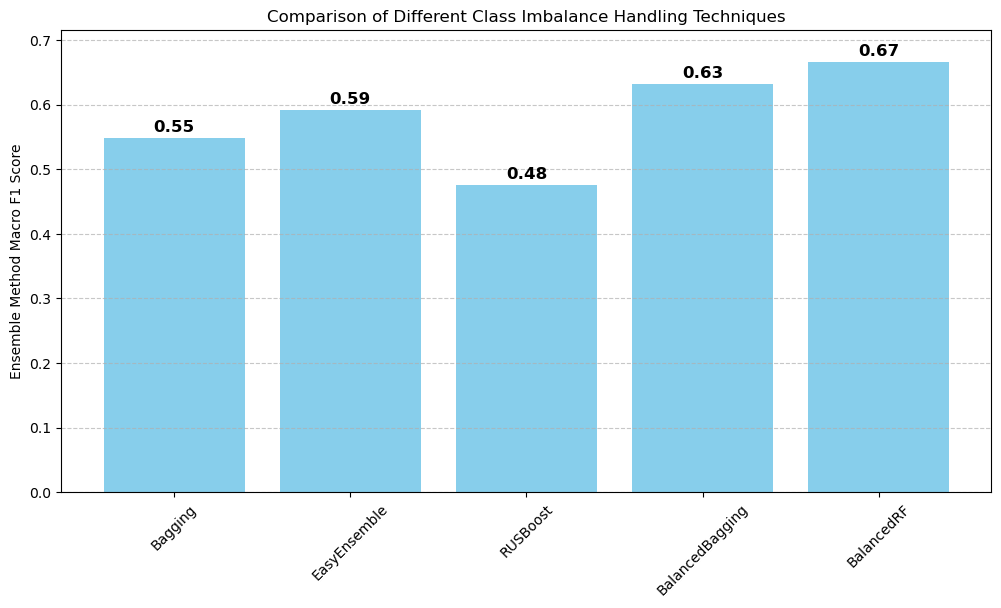

In [35]:
#Task 8
#ensemble method Macro F1 Score
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
ensemble_models = ["Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
ensemble_macro_f1_scores = [macro_f1_bagging, macro_f1_easy, macro_f1_rusboost, macro_f1_bal_bagging, macro_f1_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(ensemble_models, ensemble_macro_f1_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(ensemble_macro_f1_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')


plt.xticks(rotation=45)
plt.ylabel("Ensemble Method Macro F1 Score")
plt.title("Comparison of Different Class Imbalance Handling Techniques")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

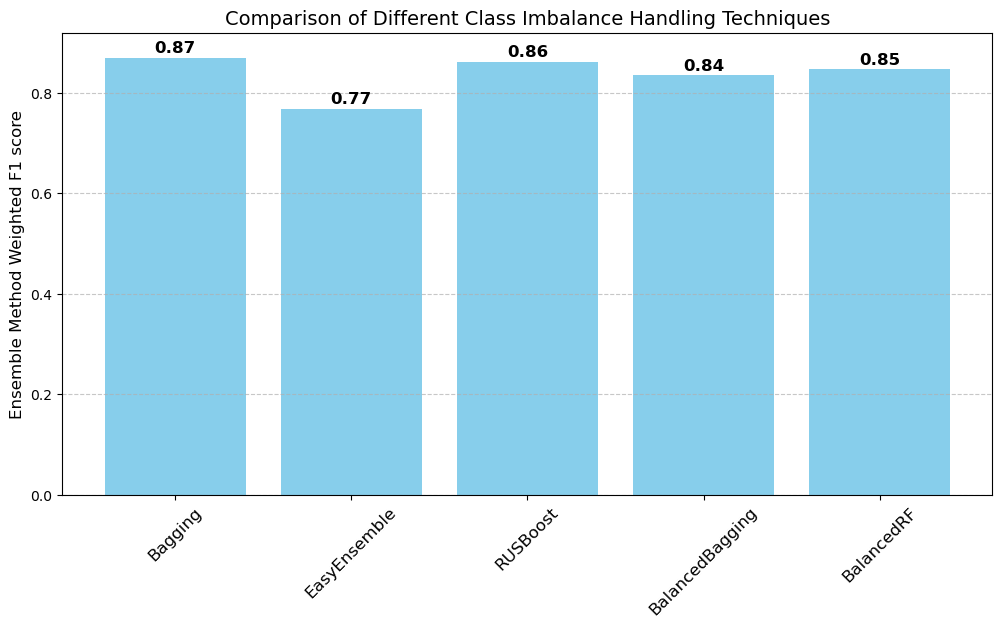

In [36]:
#Task 8
#ensemble method Weighted F1 Score
ensemble_weighted_f1_scores = [weighted_f1_bagging, weighted_f1_easy, weighted_f1_rusboost, weighted_f1_bal_bagging, weighted_f1_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(ensemble_models, ensemble_weighted_f1_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(ensemble_weighted_f1_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Ensemble Method Weighted F1 score", fontsize=12)
plt.title("Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

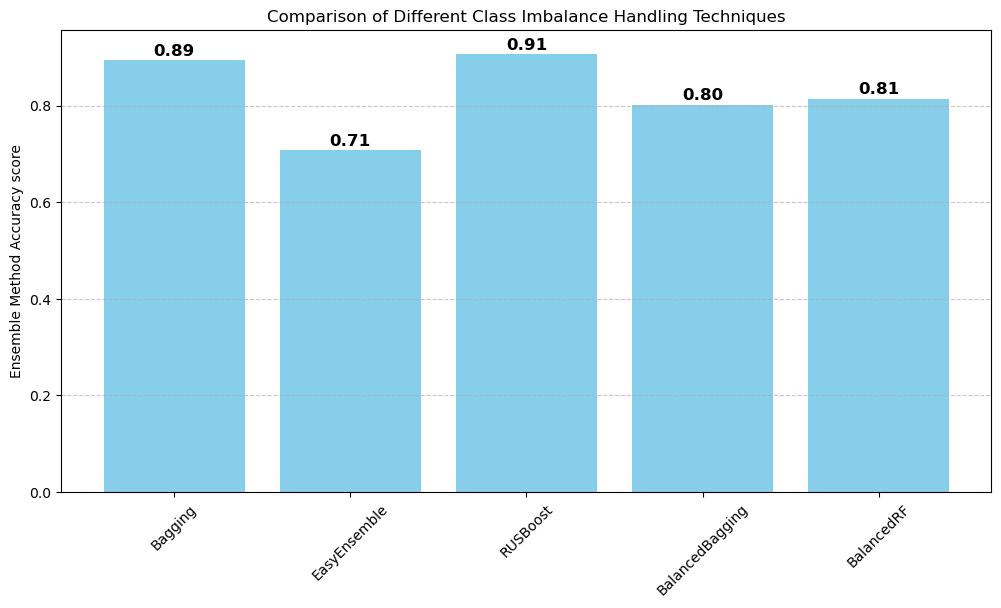

In [37]:
#Task 8
#ensemble method Accuracy Score
ensemble_accuracy_scores = [accuracy_bagging, accuracy_easy, accuracy_rusboost, accuracy_bal_bagging, accuracy_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(ensemble_models, ensemble_accuracy_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(ensemble_accuracy_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')


plt.xticks(rotation=45)
plt.ylabel("Ensemble Method Accuracy score")
plt.title("Comparison of Different Class Imbalance Handling Techniques")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
print('----------Combined Evaluation Charts--------------')

----------Combined Evaluation Charts--------------


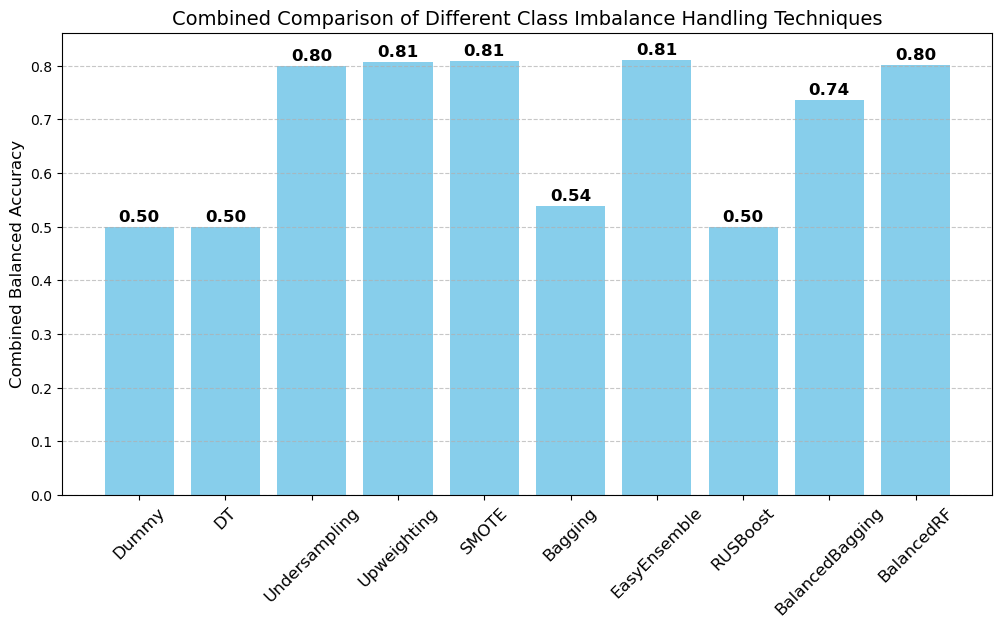

In [39]:
# Combined Balance Accuracy
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
combined_models = ["Dummy", "DT", "Undersampling", "Upweighting", "SMOTE", "Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
combined_balanced_accuracies = [bal_acc_dummy, bal_acc_dt, bal_acc_rus, bal_acc_weighted, bal_acc_smote, bal_acc_bagging, bal_acc_easy, bal_acc_rusboost, bal_acc_bal_bagging, bal_acc_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(combined_models, combined_balanced_accuracies, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(combined_balanced_accuracies) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Combined Balanced Accuracy", fontsize=12)
plt.title("Combined Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

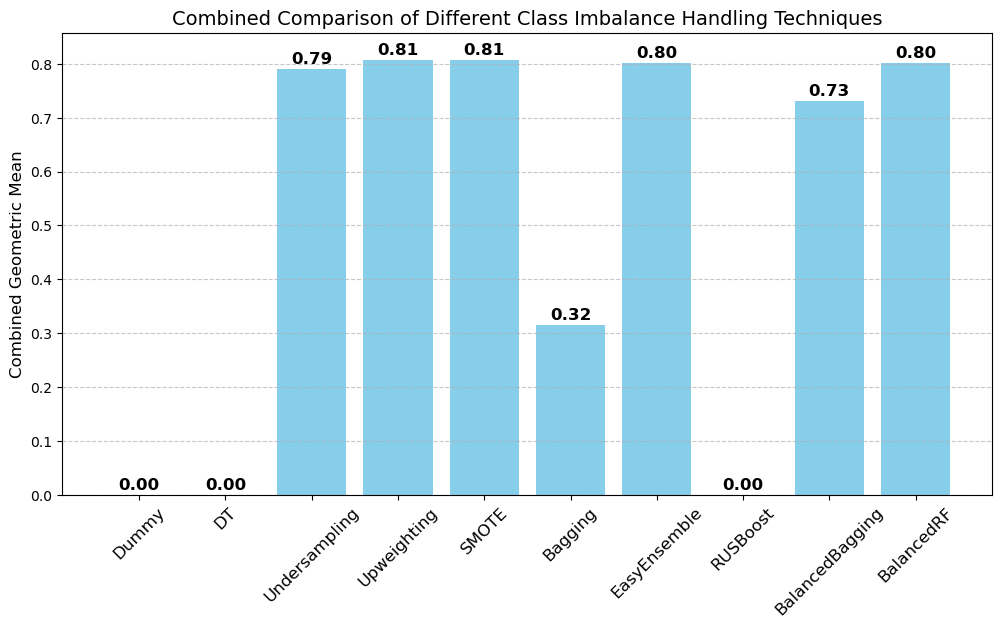

In [40]:
#Combined Geometric Mean
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
combined_models = ["Dummy", "DT", "Undersampling", "Upweighting", "SMOTE", "Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
combined_geo_mean_scores = [geo_mean_dummy, geo_mean_dt, geo_mean_rus, geo_mean_weighted, geo_mean_smote, geo_mean_bagging, geo_mean_easy, geo_mean_rusboost, geo_mean_bal_bagging, geo_mean_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(combined_models, combined_geo_mean_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(combined_geo_mean_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Combined Geometric Mean", fontsize=12)
plt.title("Combined Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

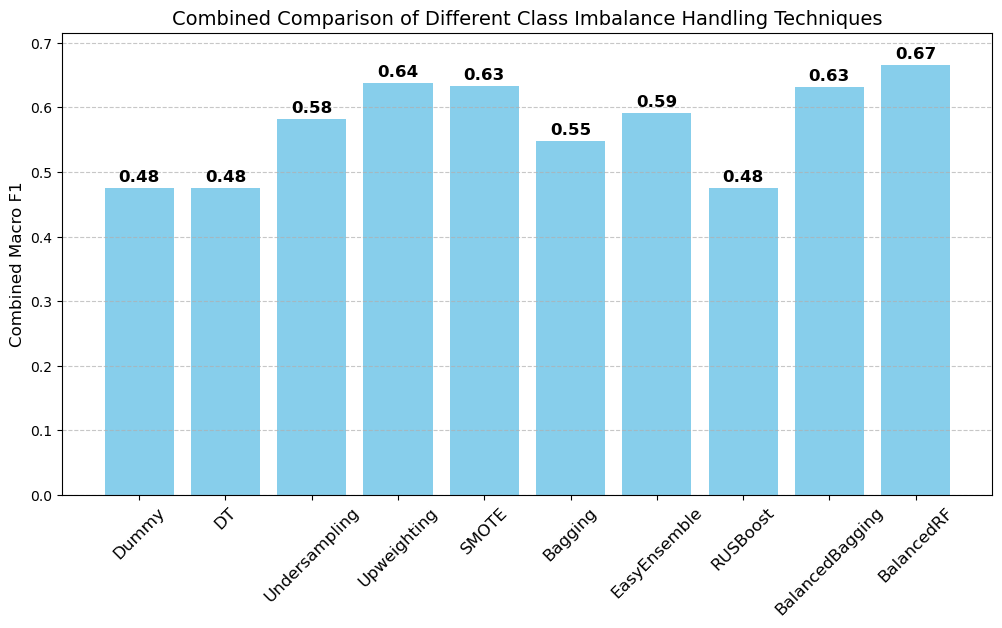

In [41]:
#Combined Macro F1
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
combined_models = ["Dummy", "DT", "Undersampling", "Upweighting", "SMOTE", "Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
combined_macro_f1_scores = [macro_f1_dummy, macro_f1_dt, macro_f1_rus, macro_f1_weighted, macro_f1_smote, macro_f1_bagging, macro_f1_easy, macro_f1_rusboost, macro_f1_bal_bagging, macro_f1_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(combined_models, combined_macro_f1_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(combined_macro_f1_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Combined Macro F1", fontsize=12)
plt.title("Combined Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

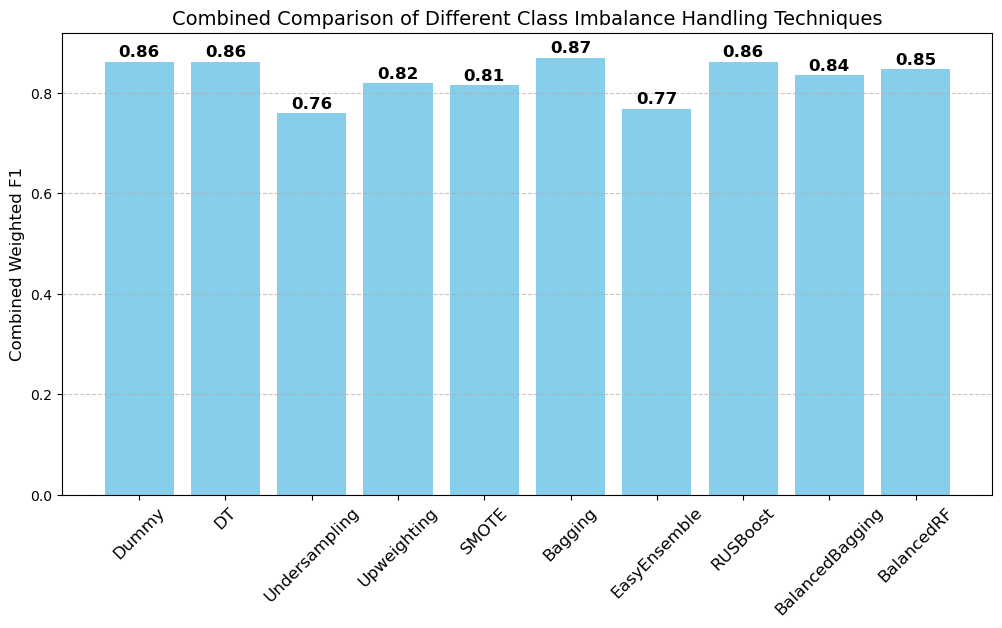

In [42]:
#Combined Weighted F1 Score
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
combined_models = ["Dummy", "DT", "Undersampling", "Upweighting", "SMOTE", "Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
combined_weighted_f1_scores = [weighted_f1_dummy, weighted_f1_dt, weighted_f1_rus, weighted_f1_weighted, weighted_f1_smote, weighted_f1_bagging, weighted_f1_easy, weighted_f1_rusboost, weighted_f1_bal_bagging, weighted_f1_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(combined_models, combined_weighted_f1_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(combined_weighted_f1_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Combined Weighted F1", fontsize=12)
plt.title("Combined Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

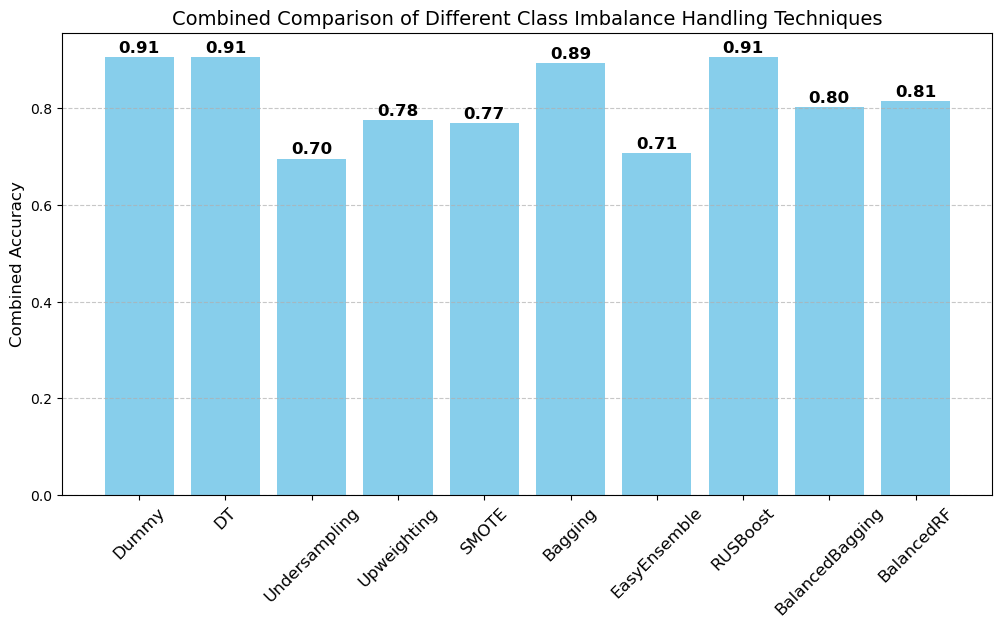

In [43]:
#Combined Accuracy
import matplotlib.pyplot as plt
import numpy as np

# Define metric names and values
combined_models = ["Dummy", "DT", "Undersampling", "Upweighting", "SMOTE", "Bagging", "EasyEnsemble", "RUSBoost", "BalancedBagging", "BalancedRF"]
combined_accuracy_scores = [accuracy_dummy, accuracy_dt, accuracy_rus, accuracy_weighted, accuracy_smote, accuracy_bagging, accuracy_easy, accuracy_rusboost, accuracy_bal_bagging, accuracy_bal_rf]

# Plot results
plt.figure(figsize=(12,6))
bars = plt.bar(combined_models, combined_accuracy_scores, color='skyblue')

# Adjust y-axis limits dynamically
y_max = max(combined_accuracy_scores) + 0.05  # Add some space above the highest bar
plt.ylim(0, y_max)

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 0.01,  # Slightly above the bar
             f'{bar.get_height():.2f}',  # Format to 2 decimal places
             ha='center', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Combined Accuracy", fontsize=12)
plt.title("Combined Comparison of Different Class Imbalance Handling Techniques", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
print('-------Result Analysis-------------')

-------Result Analysis-------------


In [46]:
print('Accuracy is a reliable measure for balanced datasets; however, since the \'abalon\' dataset has class imbalance or a long-tail distribution problem, metrics like Balanced Accuracy, Geometric Mean, and Macro-averaged F1-score are more appropriate for evaluation. Among the evaluated methods — Dummy, Decision Tree (DT), Random Undersampling, Balance Class Upweighting, and SMOTE — the graph indicates that Balance Class Upweighting and SMOTE achieve higher Balanced Accuracy and Geometric Mean scores, with Balance Class Upweighting having the highest Macro F1-score. When combined with ensemble methods, Balance Class Upweighting, SMOTE, and EasyEnsemble achieve the highest Balanced Accuracy, while Balance Class Upweighting and SMOTE also maintain top Geometric Mean scores compared to ensemble methods. For the Macro-averaged F1-score, the BalancedRandomForestClassifier has the highest score of 0.67, followed by Balance Class Upweighting with 0.64. Overall, Balance Class Upweighting emerges as the most effective classifier due to its consistently strong performance across multiple metrics.')

Accuracy is a reliable measure for balanced datasets; however, since the 'abalon' dataset has class imbalance or a long-tail distribution problem, metrics like Balanced Accuracy, Geometric Mean, and Macro-averaged F1-score are more appropriate for evaluation. Among the evaluated methods — Dummy, Decision Tree (DT), Random Undersampling, Balance Class Upweighting, and SMOTE — the graph indicates that Balance Class Upweighting and SMOTE achieve higher Balanced Accuracy and Geometric Mean scores, with Balance Class Upweighting having the highest Macro F1-score. When combined with ensemble methods, Balance Class Upweighting, SMOTE, and EasyEnsemble achieve the highest Balanced Accuracy, while Balance Class Upweighting and SMOTE also maintain top Geometric Mean scores compared to ensemble methods. For the Macro-averaged F1-score, the BalancedRandomForestClassifier has the highest score of 0.67, followed by Balance Class Upweighting with 0.64. Overall, Balance Class Upweighting emerges as th